## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
data = pd.read_csv("data.csv")
print(data)

     Study Hours  Exam Score
0           8.36       46.58
1           3.43       19.47
2           2.72       11.35
3           6.62       38.61
4           8.63       44.56
..           ...         ...
100         6.16       29.23
101         8.00       45.62
102         1.27        5.28
103         1.57        6.26
104         3.86       30.95

[105 rows x 2 columns]


In [12]:
data.rename(columns={'Study Hours':'studytime','Exam Score':'score'},inplace=True)

In [13]:
data.head()

,studytime,score
0,8.36,46.58
1,3.43,19.47
2,2.72,11.35
3,6.62,38.61
4,8.63,44.56


#### MSE

In [34]:
def loss_function(m,b,data):
    total_error=0

    for i in range(len(data)):
        x = data.iloc[i].studytime
        y = data.iloc[i].score

        total_error+=(y-m*x-b)**2

    total_error=total_error/float(len(data))
    return total_error

#### Gradient Descent 

In [35]:
def gradient_descent(m_now,b_now,L,data):
    m_gradient=0
    b_gradient=0
    n = len(data)

    for i in range(n):
        x = data.iloc[i].studytime
        y = data.iloc[i].score
        m_gradient+=-(2/n)*x*(y-m_now*x-b_now)
        b_gradient+=-(2/n)*(y-m_now*x-b_now)

    m = m_now-L*m_gradient
    b = b_now - L*b_gradient
    return m,b

In [36]:
m =0
b = 0
L=0.0001
epochs=1000

In [37]:
for i in range(epochs):
    m,b = gradient_descent(m,b,L,data)
print(m,b)

4.980308973343043 0.644564792436042


In [39]:
loss_function(m,b,data)

27.37401829723807

In [40]:
data['studytime'].max()

11.94

In [41]:
data['studytime'].min()

0.19

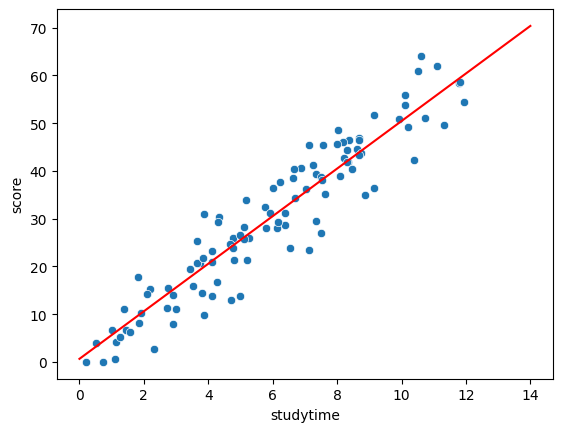

In [45]:
sns.scatterplot(x="studytime",y="score",data=data)
plt.plot(list(range(0,15)),[m*x+b for x in range(0,15)],color='red')